# Conducción de calor 1D: condiciones de tipo Neumann

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluation import Quizz, FileAnswer
quizz = Quizz('2', 'GeoMaC', 'Conduccion_de_calor_1D', 'local')
#file_answer = FileAnswer('GeoMaC', 'Conduccion_de_calor_1D', 'local')

Considere el siguiente problema:

$$
\begin{eqnarray}
	-\frac{d^2 u(x)}{d x^2} & = & -e^x \,\,\,\,\, x \in [0,1] \label{eq:cal2}\\
	\frac{du}{d n}(0) & = & 0 \nonumber\\
	u(1) & = & 3 \nonumber
\end{eqnarray}
$$

cuya solución analítica es:
$\displaystyle u(x) = e^x - x - e + 4 $

Observa que en este caso se proporciona una condición de tipo **Neumann** en la frontera izquierda del dominio ($x=0$).

## Funciones.

In [2]:
def buildMatrix(N, d):
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = d
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = d
    
    return A
    
def solExact(x):
    return np.exp(x) - x - np.e + 4

In [3]:
# Parámetros físicos
L = 1.0
f_A = 0.0  # Flujo en A (Neumman)
b_B = 3.0  # Valor de u en B (Dirichlet)
k = 1.0

# Parámetros numéricos
N = 4 # Número de incógnitas
h = L / (N+1)

# Coordenadas de los nodos
x = np.linspace(0, L, N+2)

# Solución exacta en los nodos
sol_e = solExact(x) 

# Construcción de la matriz
A = buildMatrix(N+1, 2)    

# Lado derecho del sistema
b = np.zeros(N+1)

# Fuente o sumidero
b[1:] = -np.exp(x[1:-1])*h**2 

# Condición de frontera en B
b[-1] += b_B

## <font color="DodgerBlue">Ejercicio 1.</font>

---

Definir lo siguiente:

* La función `Neumann_I(A, b, bcond)` que implemente la aproximación I de la presentación "Problemas de Calibración" (página 12).
* Llamada a la función `Neumann_I(A, b, bcond)` con los parámetros adecuados.
  
---

In [4]:
### BEGIN SOLUTION
def Neumann_I(A, b, bcond):
    A[0][0] = 1
    A[0][1] = -1
    A[0][2] = 0
    b[0] = bcond

# Corrección de la matriz y el RHS, orden lineal
Neumann_I(A, b, h * f_A)
### END SOLUTION

# Arreglo para almacenar la solución
u1 = np.zeros(N+2)

# Condición de frontera del lado derecho: Dirichlet
u1[-1] = b_B

# Solución del sistema lineal
u1[:N+1] = np.linalg.solve(A,b)

print('Solución numérica: {}'.format(u1))

Solución numérica: [2.39076545 2.39076545 2.43962156 2.54815066 2.72956451 3.        ]


In [5]:
quizz.eval_numeric('1', u1)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 2.</font>

---

* Calcular el error de la solución numérica `u1` con respecto a la solución exacta `sol_e` usando la definición **Grid norm 2** descrita en la "Problemas de Calibración" (página 20).
  
---


In [6]:
### BEGIN SOLUTION
# Cálculo del error
e1 = np.sqrt(h) * np.linalg.norm(sol_e - u1, 2) 

#file_answer.write('2', e1, 'La implementación del error Grid norm 2 parece no ser correcta.')
### END SOLUTION

print('Error: {}'.format(e1))

Error: 0.07266429782458109


In [7]:
quizz.eval_numeric('2', e1)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


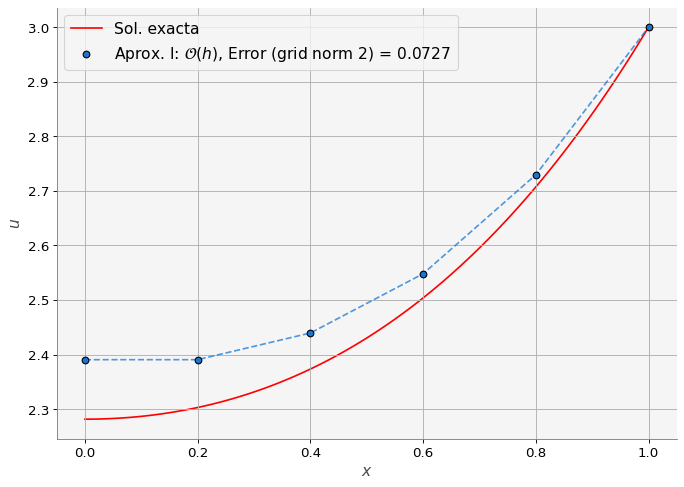

In [8]:
# Graficación de la solución y el error
error_label_1 = 'Error (grid norm {}) = {:0.4f}'.format(2, e1)

plt.figure(figsize=(10,7))

# Graficación de la solución exacta
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol),'r-', label='Sol. exacta', zorder=0)

# Graficación de la solución numérica
plt.scatter(x, u1, marker='o', edgecolor='k', zorder=5,
            label='Aprox. I: $\mathcal{O}(h)$, ' + error_label_1)
plt.plot(x, u1, '--', lw=1.5, alpha=0.75)

# Decoración de la gráfica
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='upper left', fontsize=14)
plt.grid()
plt.show()

## <font color="DodgerBlue">Ejercicio 3.</font>

---

Definir lo siguiente:

* La función `Neumann_II(A, b, bcond)` que implemente la aproximación II de la presentación "Problemas de Calibración" (página 15).
* Llamada a la función `Neumann_II(A, b, bcond)` con los parámetros adecuados.
  
---

In [9]:
### BEGIN SOLUTION
def Neumann_II(A, b, bcond):
    A[0][0] = 3
    A[0][1] = -4
    A[0][2] = 1
    b[0] = bcond

# Corrección de la matriz y el RHS, orden lineal
Neumann_II(A, b, 2 * h * f_A) 
### END SOLUTION

# Arreglo para almacenar la solución
u2 = np.zeros(N+2)

# Condición de frontera del lado derecho: Dirichlet
u2[-1] = b_B

# Solución del sistema lineal
u2[:N+1] = np.linalg.solve(A,b)

print('Solución numérica: {}'.format(u2))

Solución numérica: [2.26862518 2.29305323 2.3663374  2.49929455 2.70513646 3.        ]


In [10]:
quizz.eval_numeric('3', u2)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 4.</font>

---

* Calcular el error de la solución numérica `u2` con respecto a la solución exacta `sol_e` usando la definición **Grid norm 2** descrita en la "Problemas de Calibración" (página 20).
  
---

In [11]:
### BEGIN SOLUTION
# Cálculo del error
e2 = np.sqrt(h) * np.linalg.norm(sol_e - u2, 2) 

#file_answer.write('4', e2, 'La implementación del error Grid norm 2 parece no ser correcta.')
### END SOLUTION

print('Error: {}'.format(e2))

Error: 0.008364723421555469


In [12]:
quizz.eval_numeric('4', e2)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


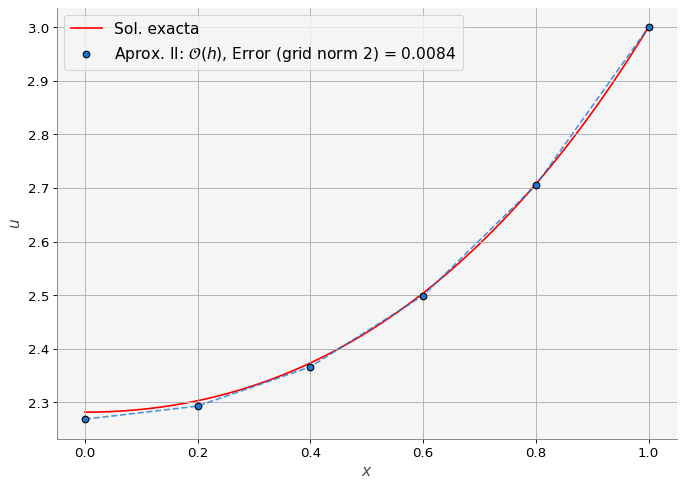

In [13]:
# Graficación de la solución y el error
error_label_2 = 'Error (grid norm {}) = {:0.4f}'.format(2, e2)

plt.figure(figsize=(10,7))

# Graficación de la solución exacta
plt.plot(xsol, solExact(xsol),'r-', label='Sol. exacta', zorder=0)

# Graficación de la solución numérica
plt.scatter(x, u2, marker='o', edgecolor='k', zorder=5,
            label='Aprox. II: $\mathcal{O}(h)$, ' + error_label_2)
plt.plot(x, u2, '--', lw=1.5, alpha=0.75)

# Decoración de la gráfica
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='upper left', fontsize=14)
plt.grid()
plt.show()

## <font color="DodgerBlue">Ejercicio 5.</font>

---

Definir lo siguiente:

* La función `Neumann_III(A, b, bcond)` que implemente la aproximación II de la presentación "Problemas de Calibración" (página 18).
* Llamada a la función `Neumann_III(A, b, bcond)` con los parámetros adecuados.
  
---

In [14]:
### BEGIN SOLUTION
def Neumann_III(A, b, bcond):
    A[0][0] = 2
    A[0][1] = -2
    A[0][2] = 0
    b[0] = bcond

# Corrección de la matriz y el RHS, orden lineal
Neumann_III(A, b, -np.exp(x[0]) * h**2 + 2 * h * f_A)
### END SOLUTION

# Arreglo para almacenar la solución
u3 = np.zeros(N+2)

# Condición de frontera del lado derecho: Dirichlet
u3[-1] = b_B

# Solución del sistema lineal
u3[:N+1] = np.linalg.solve(A,b)

print('Solución numérica: {}'.format(u3))

Solución numérica: [2.29076545 2.31076545 2.37962156 2.50815066 2.70956451 3.        ]


In [15]:
quizz.eval_numeric('5', u3)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 6.</font>

---

* Calcular el error de la solución numérica `u3` con respecto a la solución exacta `sol_e` usando la definición **Grid norm 2** descrita en la "Problemas de Calibración" (página 20).
  
---

In [16]:
### BEGIN SOLUTION
# Cálculo del error
e3 = np.sqrt(h) * np.linalg.norm(sol_e - u3, 2) 

#file_answer.write('6', e3, 'La implementación del error Grid norm 2 parece no ser correcta.')
### END SOLUTION

print('Error: {}'.format(e3))

Error: 0.006342955932511579


In [17]:
quizz.eval_numeric('6', e3)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


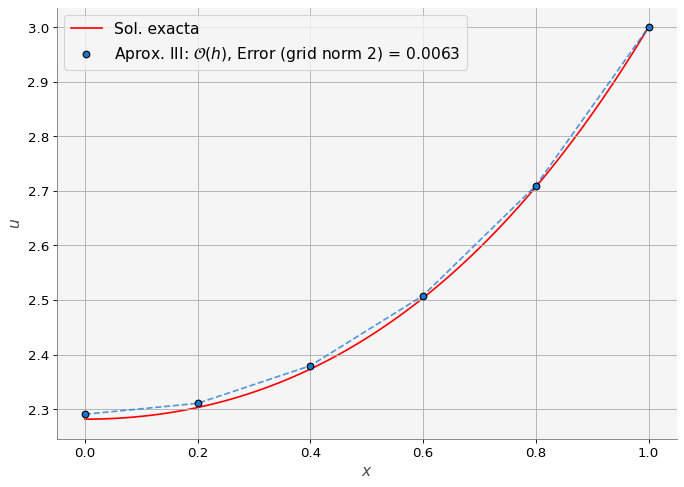

In [18]:
# Graficación de la solución y el error
error_label_3 = 'Error (grid norm {}) = {:0.4f}'.format(2, e3)

plt.figure(figsize=(10,7))

# Graficación de la solución exacta
plt.plot(xsol, solExact(xsol),'r-', label='Sol. exacta', zorder=0)

# Graficación de la solución numérica
plt.scatter(x, u3, marker='o', edgecolor='k', zorder=5,
            label='Aprox. III: $\mathcal{O}(h)$, ' + error_label_3)
plt.plot(x, u3, '--', lw=1.5, alpha=0.75)

# Decoración de la gráfica
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='upper left', fontsize=14)
plt.grid()
plt.show()

## Graficación de las tres aproximaciones.

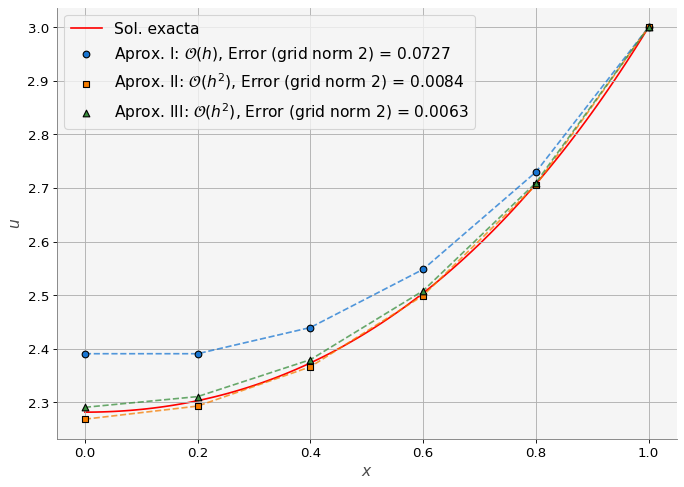

In [19]:
plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol),'r-', label='Sol. exacta', zorder=0)
plt.scatter(x, u1, marker='o', edgecolor='k', zorder=5,
            label='Aprox. I: $\mathcal{O}(h)$, ' + error_label_1)
plt.plot(x, u1, '--', lw=1.5, alpha=0.75)
plt.scatter(x, u2, marker='s', edgecolor='k', zorder=5,
            label='Aprox. II: $\mathcal{O}(h^2)$, ' + error_label_2)
plt.plot(x, u2, '--', lw=1.5, alpha=0.75)
plt.scatter(x, u3, marker='^', edgecolor='k', zorder=5,
            label='Aprox. III: $\mathcal{O}(h^2)$, ' + error_label_3)
plt.plot(x, u3, '--', lw=1.5, alpha=0.75)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='upper left', fontsize=14)
plt.grid()
plt.show()

## Estudio de refinamiento de malla.

La función `meshRefining(...)` realiza un estudio de refinamiento de malla para determinar la mejor aproximación de las condiciones de frontera de tipo Neumann. 


In [20]:
def meshRefining(fcond, nodos, norma):
    """
    Función que permite realizar un estudio de
    refinamiento de malla.
    
    Parameters:
    -----------
    fcondNeumman: function
    función que establece la aproximación para la condición 
    de frontera de tipo Neumman.
    
    nodes: list
    Lista de número de nodos que se usarán para el estudio
    de refinamiento de malla.
    
    norma: 
    Define el tipo de grid norm que se usará para calcular el 
    error con respecto a la solución exacta.
    
    Returns:
    --------
    e_lista: list
    Lista con los errores calculados para los diferentes números
    de nodos.
    """
    e_lista = []
    for N in nodos:
        h = L / (N+1)        
        r = k / h**2

        # Coordenadas de los nodos
        x = np.linspace(0, L, N+2)

        sole = solExact(x)

        A = buildMatrix(N+1, 2)      # Construcción de la matriz
        b = np.zeros(N+1)            # Lado derecho del sistema
        b[1:] = -np.exp(x[1:-1]) / r # Fuente o sumidero
        b[-1] += b_B                 # Condición de frontera en B

        if fcond.__name__ == 'Neumann_I':
            bcond = h * f_A
        elif fcond.__name__ == 'Neumann_II':
            bcond = 2 * h * f_A
        elif fcond.__name__ == 'Neumann_III':
            bcond = -0.5/r + h * f_A

        fcond(A, b, bcond) # Corrección de la matriz y el RHS

        u = np.zeros(N+2) # Arreglo para almacenar la solución
        u[-1] = b_B       # Frontera derecha Dirichlet
        u[:N+1] = np.linalg.solve(A,b)       # Sol. del sist. lineal
        e_lista.append(np.linalg.norm(sole - u, norma)) # Cálculo del error

    return e_lista

## <font color="DodgerBlue">Ejercicio 7.</font>

---

Usando la función `meshRefining(...)` realiza un estudio de refinamiento de malla para determinar la mejor aproximación de las condiciones de frontera de tipo Neumann para el problema planteado en esta notebook.

* Definir un arreglo con el número de nodos como sigue: $nodos = \{2^i | \forall i \in  [2,3,\dots8] \}$
* Calcular las $h$´s correspondientes a estos nodos y almacenarlas en el arreglo: `h_lista`.
---


In [21]:
### BEGIN SOLUTION
nodos = [2**i for i in range(2,8)]
h_lista = [L/(n+1) for n in nodos]

#file_answer.write('7', h_lista, 'Checa la lista de nodos y el cálculo de las h´s.')
### END SOLUTION

print('Nodos: {}'.format(nodos))
print('h: {}'.format(h_lista))

Nodos: [4, 8, 16, 32, 64, 128]
h: [0.2, 0.1111111111111111, 0.058823529411764705, 0.030303030303030304, 0.015384615384615385, 0.007751937984496124]


In [22]:
quizz.eval_numeric('7', h_lista)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 8.</font>

---

Usando los arreglos `nodos`, `h_lista`, las funciones `Neumann_I()`, `Neumann_II()`, `Neumann_III()` y `meshRefining()` realiza un estudio de refinamiento de malla para determinar la mejor aproximación de las condiciones de frontera de tipo Neumann para el problema planteado en esta notebook.

---

In [23]:
### BEGIN SOLUTION
norma = np.inf
e1m = meshRefining(Neumann_I, nodos, norma)
e2m = meshRefining(Neumann_II, nodos, norma)
e3m = meshRefining(Neumann_III, nodos, norma)

#file_answer.write('8', e1m, 'La implementación de la llamada a meshRefining() para Neumann_I no es correcta.')
#file_answer.write('9', e2m, 'La implementación de la llamada a meshRefining() para Neumann_II no es correcta.')
#file_answer.write('10', e3m, 'La implementación de la llamada a meshRefining() para Neumann_III no es correcta.')
### END SOLUTION

print('Errores para Neumann_I: {}'.format(e1m))
print('Errores para Neumann_II: {}'.format(e2m))
print('Errores para Neumann_III: {}'.format(e3m))

Errores para Neumann_I: [0.10904728226552596, 0.05835083948479003, 0.030195480658391283, 0.01535951849054662, 0.007745922239629444, 0.0038895813335773077]
Errores para Neumann_II: [0.013092993550491094, 0.003733553223093544, 0.000998285860006387, 0.00025816090671559877, 6.564366654870923e-05, 1.6550689755145953e-05]
Errores para Neumann_III: [0.05904728226552658, 0.030573061707011906, 0.015489598305451047, 0.007783760914787496, 0.0038997683934738347, 0.0019515968374537174]


In [25]:
quizz.eval_numeric('8', e1m)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [26]:
quizz.eval_numeric('9', e2m)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [27]:
quizz.eval_numeric('10', e3m)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


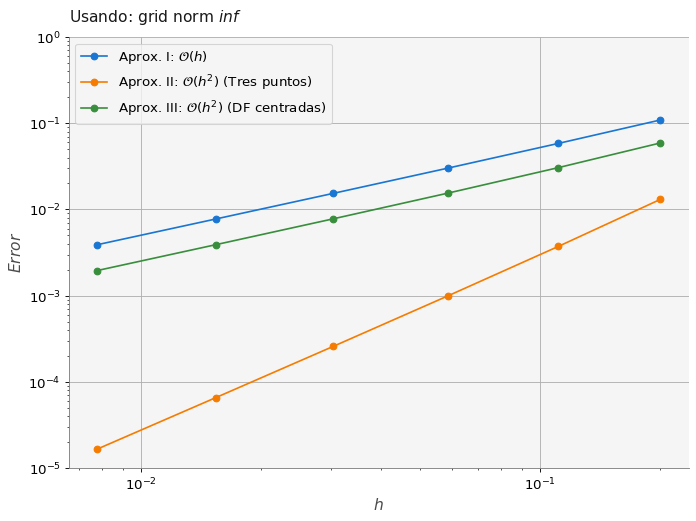

In [28]:
#
# El siguiente código genera las gráficas usando los resultados anteriores:
#
plt.figure(figsize=(10,7))
plt.plot(h_lista, e1m, 'o-', label='Aprox. I: $\mathcal{O}(h)$')
plt.plot(h_lista, e2m, 'o-', label='Aprox. II: $\mathcal{O}(h^2)$ (Tres puntos)')
plt.plot(h_lista, e3m, 'o-', label='Aprox. III: $\mathcal{O}(h^2)$ (DF centradas)')
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12)
plt.ylim(1e-5,1)
plt.ylabel('$Error$')
plt.xlabel('$h$')
plt.title('Usando: grid norm ${}$'.format(norma))
plt.grid()
plt.show()

In [ ]:
#file_answer.to_file('2')

In [ ]:
#file_answer.write('1', u1, 'Es probable que la implementación y/o la llamada de la función Neumann_I() no sea correcta.')
#file_answer.write('3', u2, 'Es probable que la implementación y/o la llamada de la función Neumann_II() no sea correcta.')
#file_answer.write('5', u3, 'Es probable que la implementación y/o la llamada de la función Neumann_III() no sea correcta.')